# Spotify 1 Million Tracks - Tratamento e Modelação

### Importe das Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score, confusion_matrix,f1_score, classification_report
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
%matplotlib inline


# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Tratamento dos Dados

Carregar o dataset, previamente analisado

In [3]:
data = pd.read_csv('data.csv')

Eliminar coluns irrelevantes:
id e name

In [4]:
# Drop Id and Track Id columns
data.drop(['id', 'release_date'], axis=1, inplace=True, errors='ignore')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Remover duplicados

In [5]:
data.drop_duplicates(inplace=True)
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Tratamento dos artistas

In [6]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)
data['artists'] = data['artists'].str.split(', ')
data = data.explode('artists')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,Robert Schumann,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9940,Vladimir Horowitz,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,Kygo,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169906,0.5380,Oh Wonder,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,Cash Cash,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020
169907,0.0714,Andy Grammer,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Encoding dos artistas

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['artists'] = label_encoder.fit_transform(data['artists'])

Encoding do nome da música

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])

<Axes: >

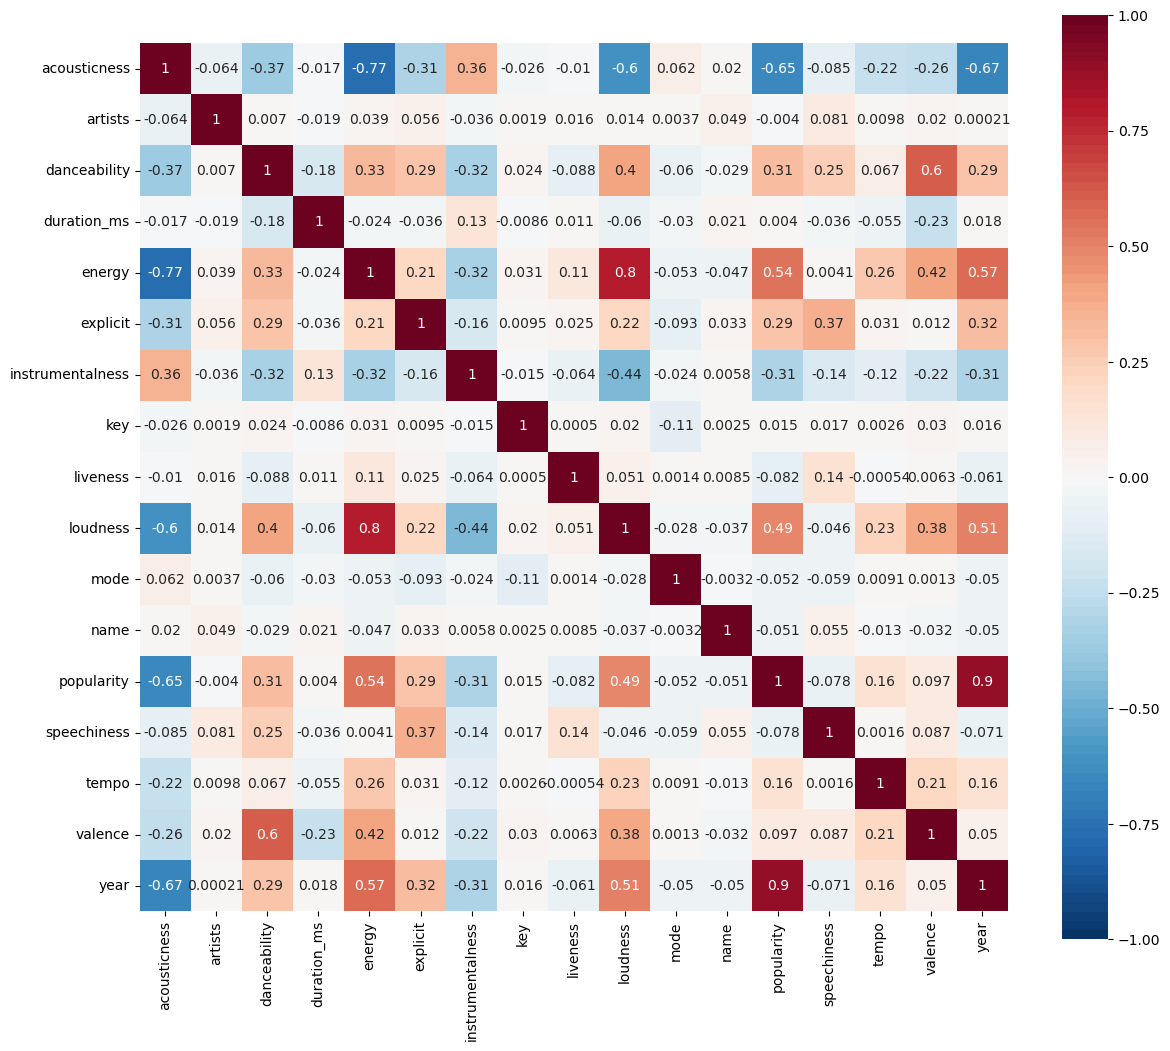

In [9]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

Removemos a coluna year porque está muito correlacionada com a popularidade

In [10]:
data.drop(['year'], axis=1, inplace=True, errors='ignore')

## Modelação 

Partição dos Dados entre dados de treino e teste

In [11]:
X = data.drop(['popularity'], axis=1)
y = data['popularity']
X


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
0,0.9950,4166,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,96100,0.0506,118.469,0.7790
1,0.9940,20519,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,34247,0.0462,83.972,0.0767
1,0.9940,26210,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,34247,0.0462,83.972,0.0767
2,0.6040,21595,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,18622,0.9290,107.177,0.8800
3,0.9950,8356,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,11093,0.0926,108.003,0.7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,13656,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,45940,0.1050,123.700,0.1530
169906,0.5380,18049,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,45940,0.1050,123.700,0.1530
169907,0.0714,4302,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,47513,0.0385,129.916,0.4720
169907,0.0714,1534,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,47513,0.0385,129.916,0.4720


In [12]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Problema de regressão

Validação de modelos 
- sklearn.model_selection.train_test_split
- sklearn.model_selection.Kfold
- sklearn.model_selection.LeaveOneOut
- sklearn.model_selection.StratifiedKFold
- sklearn.model_selection.GridSearchCV
- sklearn.model_selection.RandomizedSearchCV

#### Modelo de Regressão Linear

Criação do modelo

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Previsões do modelo

In [14]:
predictions = lm.predict(X_test)
predictions

array([34.0540809 ,  8.8917781 ,  5.89222423, ..., 15.41312522,
       15.52233129, 43.3064539 ])

Gráfico de previsão vs valor real
- X: valor real
- Y: previsão

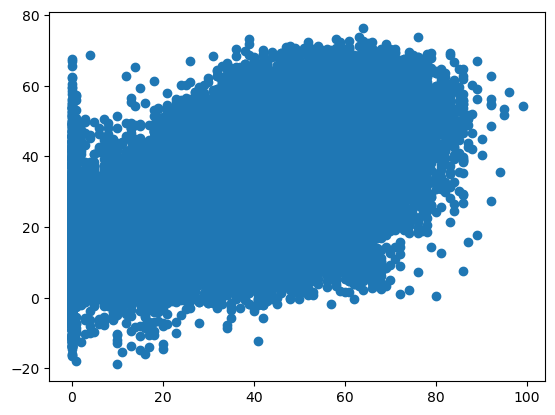

In [15]:
plt.scatter(y_test, predictions)

<Axes: xlabel='popularity', ylabel='Count'>

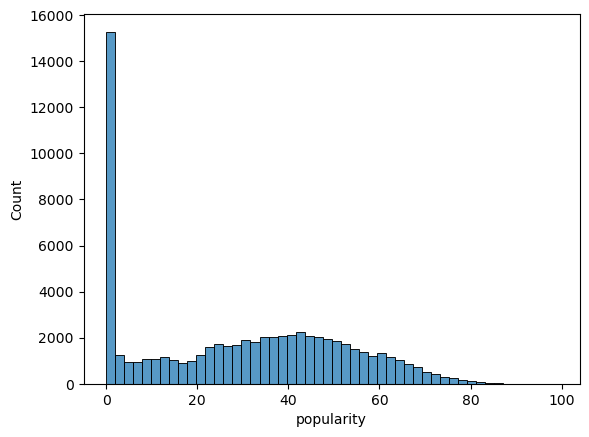

In [16]:
sns.histplot(y_test, bins=50)

<Axes: ylabel='Count'>

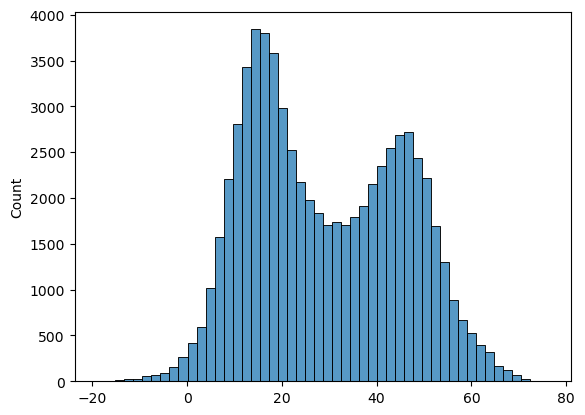

In [17]:
sns.histplot(predictions, bins=50)

Valor máximo da previsão

In [18]:
predictions.max()

76.19943352080648

Comparar os valores previstos com os reais

In [19]:
pd.merge(pd.DataFrame(y_test), pd.DataFrame(predictions), left_index=True, right_index=True)    

,popularity,0
4,1,23.868198
6,0,48.792096
8,0,10.844092
11,1,47.337763
12,0,36.483167
...,...,...
67612,45,27.329329
67614,29,29.665044
67616,27,5.649768
67618,32,45.016617


Avaliação do Modelo

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12.860346721324825
MSE: 254.9155895916707
RMSE: 15.966076211507657


#### Árvores de Decisão

Criação do modelo

In [21]:
dtree=DecisionTreeRegressor(random_state=2023)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2023)

Previsões do modelo

In [22]:
pred = dtree.predict(X_test)

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R²:', np.sqrt(metrics.r2_score(y_test, pred)))

MAE: 9.833431920578116
MSE: 255.60885202547496
RMSE: 15.987771953135777
R²: 0.7087542944098167


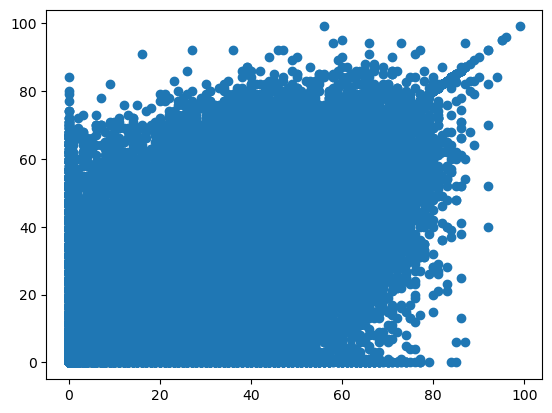

In [24]:
plt.scatter(y_test, pred)

Grid Search

In [25]:
# 'absolute_error', 'poisson', 'squared_error', 'friedman_mse'
param_grid = {'criterion':['absolute_error'],'max_depth':[4,5,6,7,8,9,10,11,12,15]}

grid_reg_bt = GridSearchCV(dtree, param_grid, refit=True, verbose=3)

In [26]:
grid_reg_bt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
grid_reg_bt_predictions = grid_reg_bt.predict(X_test)

In [ ]:
grid_reg_bt.best_params_

{'criterion': 'squared_error', 'max_depth': 8}

In [ ]:
grid_reg_bt.best_estimator_

DecisionTreeRegressor(max_depth=8, random_state=2023)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_reg_bt_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_reg_bt_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_reg_bt_predictions)))
print('R²:', np.sqrt(metrics.r2_score(y_test, grid_reg_bt_predictions)))

MAE: 6.077925674181977
MSE: 74.81610215478402
RMSE: 8.649630174451623
R²: 0.9243018727667319


#### Gradient Boosted Trees

In [ ]:
xgbreg=XGBRegressor()
xgbreg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = xgbreg.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.375482105206118
MSE: 93.32881670736776
RMSE: 9.660684070363121


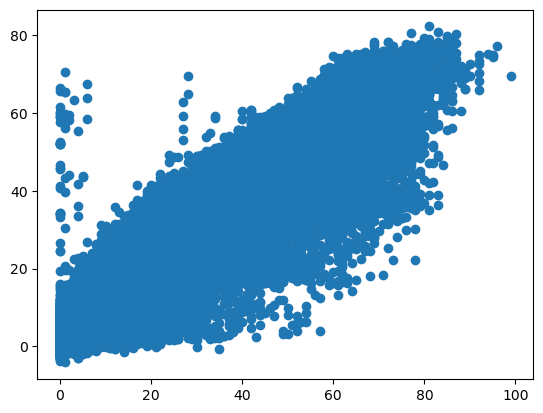

In [ ]:
plt.scatter(y_test, pred)

#### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=2023)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2023)

In [ ]:
pred = rf.predict(X_test)
pred

array([36.04 ,  0.18 , 38.29 , ..., 15.74 , 12.825, 46.69 ])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R²:', np.sqrt(metrics.r2_score(y_test, pred)))

MAE: 5.118457939816584
MSE: 59.69538993029306
RMSE: 7.72627917760503
R²: 0.9400924402533186


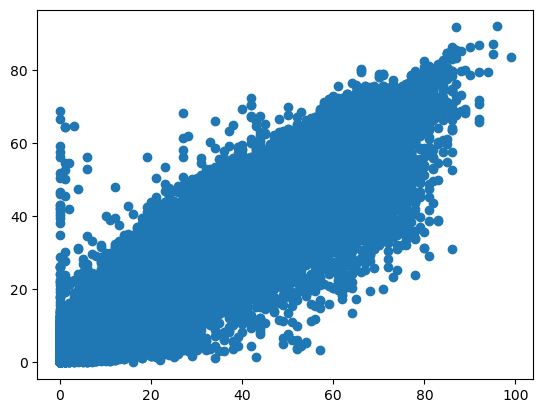

In [ ]:
plt.scatter(y_test, pred)

Redes Neuronais

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

2023-11-22 19:09:14.147602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.12.0


Data scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_Y.transform(y[y.columns]), columns=y.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=2021)

In [ ]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation=activation)) # output

    # Compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

Construção do modelo

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


2023-11-22 19:09:27.596808: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


GridSearch

In [ ]:
#optimizer = ['SGD', 'RMSprop', 'Adagrad']
optimizer = ['RMSprop'] # foi o que apresentou melhores resultados
param_grid = dict(optimizer = optimizer)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

Keras Regressor

In [ ]:
model = KerasRegressor(model = build_model, batch_size = 32, validation_split=0.2, epochs=20)

Criar um modelo Grid Search

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/40
3156/3156 [==============================] - 12s 3ms/step - loss: 29.3378 - mae: 29.3378 - mse: 1371.7740 - val_loss: 29.2722 - val_mae: 29.2722 - val_mse: 1369.9686
Epoch 2/40
3156/3156 [==============================] - 10s 3ms/step - loss: 29.3367 - mae: 29.3367 - mse: 1371.6602 - val_loss: 29.2722 - val_mae: 29.2722 - val_mse: 1369.9686
Epoch 3/40
3156/3156 [==============================] - 11s 3ms/step - loss: 29.3367 - mae: 29.3367 - mse: 1371.6586 - val_loss: 29.2722 - val_mae: 29.2722 - val_mse: 1369.9686
Epoch 4/40
3156/3156 [==============================] - 9s 3ms/step - loss: 29.3367 - mae: 29.3367 - mse: 1371.6580 - val_loss: 29.2722 - val_mae: 29.2722 - val_mse: 1369.9686
Epoch 5/40
3156/3156 [==============================] - 12s 4ms/step - loss: 29.3367 - mae: 29.3367 - mse: 1371.6569 - val_loss: 29.2722 - val_mae: 29.2722 - val_mse: 1369.9686
Epoch 6/40
3156/3156 [==============================] - 1

KeyboardInterrupt: 

Verificar qual é o valor e os parâmetros do melhor resultado

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.116266 using {'optimizer': 'RMSprop'}


In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.116266 (0.101799) with: {'optimizer': 'RMSprop'}


Encontrar o melhor modelo

In [ ]:
best_mlp_model = grid_search.best_estimator_ 
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x00000284A5697C70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=40
)


Usar o melhor modelo

In [ ]:
best_mlp_model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/40


2993/2993 [==============================] - 3s 982us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 2/40
2993/2993 [==============================] - 3s 954us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 3/40
2993/2993 [==============================] - 3s 949us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 4/40
2993/2993 [==============================] - 3s 946us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 5/40
2993/2993 [==============================] - 3s 949us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 6/40
2993/2993 [==============================] - 3s 936us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epo

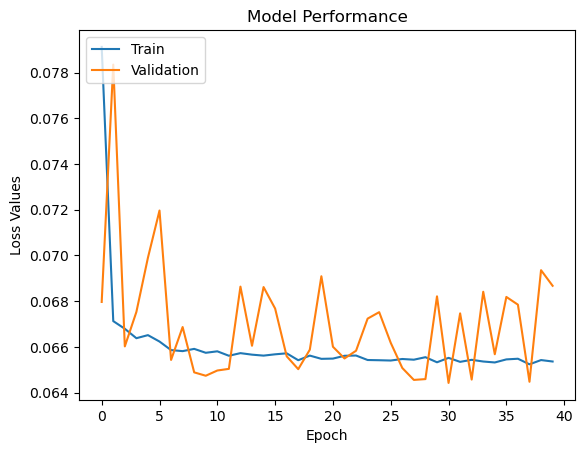

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss Values')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

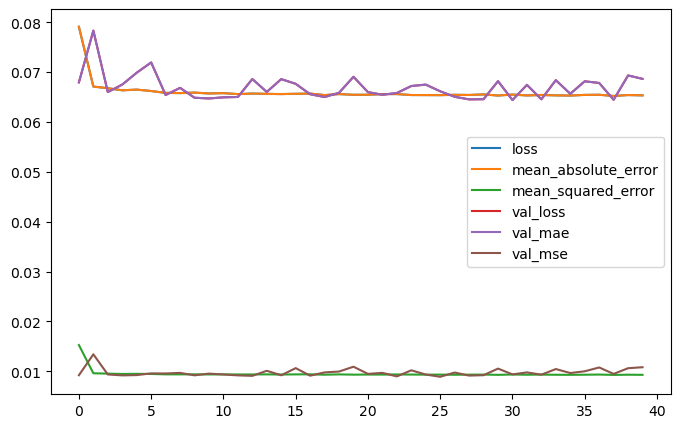

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8, 5))
plt.show()

Previsões

In [ ]:
predictions = best_mlp_model.predict(X_test)
predictions

1044/1044 [==============================] - 1s 491us/step


array([0.22877303, 0.6590394 , 0.45143   , ..., 0.23763582, 0.35282353,
       0.5141025 ], dtype=float32)

Observar os valores obtidos vs os valores reais

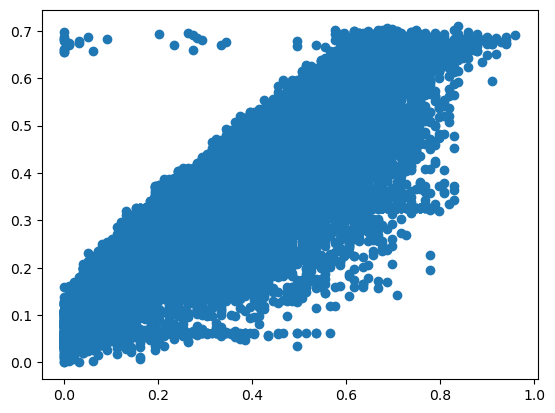

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
predictions = predictions.reshape(predictions.shape[0], 1)
predictions_unscaled = scaler_Y.inverse_transform(predictions)
y_test_unscaled = scaler_Y.inverse_transform(y_test)

Avaliar o modelo

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test_unscaled, predictions_unscaled))
print('MSE:', metrics.mean_squared_error(y_test_unscaled, predictions_unscaled))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test_unscaled, predictions_unscaled)))

MAE: 0.07832454640943247
MSE: 0.01076444189486584
RMSE 0.10375182839288107


Criar uma forma de visualizar os resultados do modelo

In [ ]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit], label='Actual', color='green')
    plt.plot(predictions[:limit], label='Predicted', color='red')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

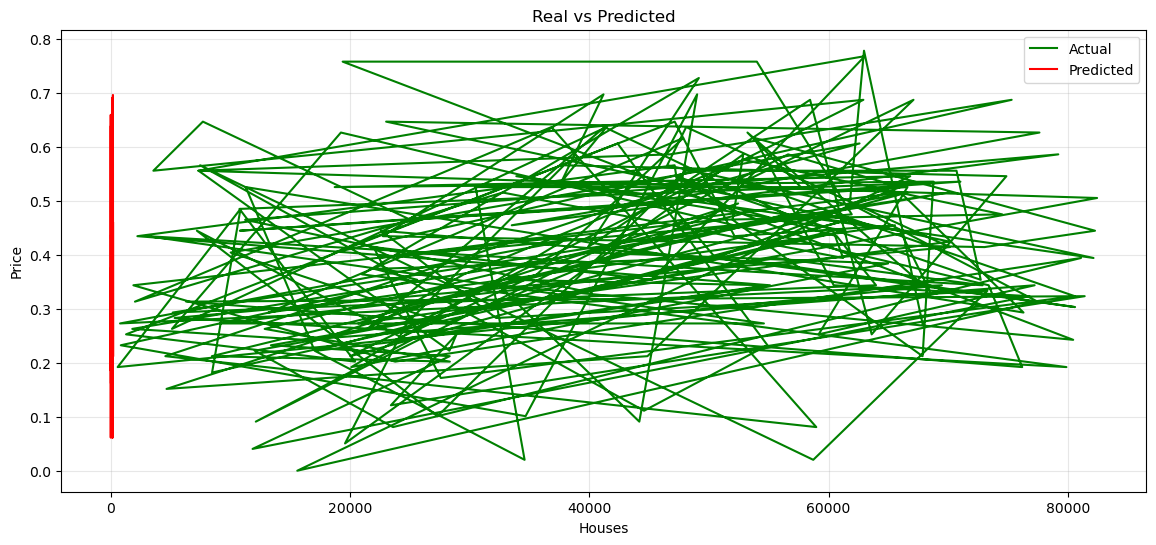

In [ ]:
real_predicted_viz(200)